In [5]:
import os
import random
from glob import glob

import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras import preprocessing

%matplotlib inline

Using TensorFlow backend.


In [6]:
class_names = ['yes', 'no']

In [7]:
width = 96
height = 96

In [8]:
def load_images(base_path):
    images = []
    path = os.path.join(base_path, '*.jpg')
    for image_path in glob(path):
        image = preprocessing.image.load_img(image_path,
                                             target_size=(width, height))
        x = preprocessing.image.img_to_array(image)

        images.append(x)
    return images

In [9]:
images_type_0 = load_images('H:/FYP/Brain_Tumor_Dataset/yes')
images_type_1 = load_images('H:/FYP/Brain_Tumor_Dataset/no')

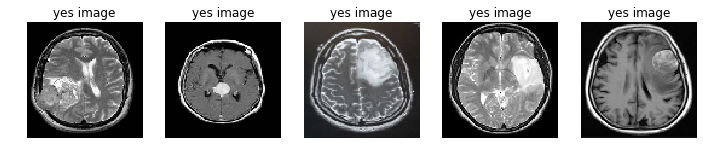

In [10]:
plt.figure(figsize=(12,8))

for i in range(5):
    plt.subplot(1, 5, i+1)
    image = preprocessing.image.array_to_img(random.choice(images_type_0))
    plt.imshow(image)
    
    plt.axis('off')
    plt.title('{} image'.format(class_names[0]))

# show the plot
plt.show()

In [12]:
X_type_0 = np.array(images_type_0)
X_type_1 = np.array(images_type_1)

print(X_type_0.shape)
print(X_type_1.shape)

(142, 96, 96, 3)
(79, 96, 96, 3)


In [13]:
# one big array containing ALL the images:
X = np.concatenate((X_type_0, X_type_1), axis=0)

In [14]:
X = X / 255.

X.shape

(221, 96, 96, 3)

In [15]:
from keras.utils import to_categorical

y_type_0 = [0 for item in enumerate(X_type_0)]
y_type_1 = [1 for item in enumerate(X_type_1)]

y = np.concatenate((y_type_0, y_type_1), axis=0)

y = to_categorical(y, num_classes=len(class_names))

print(y.shape)

(221, 2)


In [16]:
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Flatten, Dense
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import Adam

# default parameters
conv_1 = 16
conv_1_drop = 0.2
conv_2 = 32
conv_2_drop = 0.2
dense_1_n = 1024
dense_1_drop = 0.2
dense_2_n = 512
dense_2_drop = 0.2
lr = 0.001

epochs = 30
batch_size = 32
color_channels = 3

def build_model(conv_1_drop=conv_1_drop, conv_2_drop=conv_2_drop,
                dense_1_n=dense_1_n, dense_1_drop=dense_1_drop,
                dense_2_n=dense_2_n, dense_2_drop=dense_2_drop,
                lr=lr):
    model = Sequential()

    model.add(Convolution2D(conv_1, (3, 3),
                            input_shape=(width, height, color_channels),
                            activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(conv_1_drop))

    model.add(Convolution2D(conv_2, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(conv_2_drop))
        
    model.add(Flatten())
        
    model.add(Dense(dense_1_n, activation='relu'))
    model.add(Dropout(dense_1_drop))

    model.add(Dense(dense_2_n, activation='relu'))
    model.add(Dropout(dense_2_drop))

    model.add(Dense(len(class_names), activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(lr=lr),
                  metrics=['accuracy'])

    return model

In [17]:
import numpy as np
np.random.seed(1) # for reproducibility

# model with base parameters
model = build_model()

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 94, 94, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 47, 47, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)  

In [18]:
epochs = 30

In [19]:
model.fit(X, y, epochs=epochs)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
221/221 [==============================] - 4s 16ms/step - loss: 1.9328 - acc: 0.5385
Epoch 2/30
221/221 [==============================] - 2s 10ms/step - loss: 0.8231 - acc: 0.6516
Epoch 3/30
221/221 [==============================] - 2s 10ms/step - loss: 0.6222 - acc: 0.6787
Epoch 4/30
221/221 [==============================] - 3s 12ms/step - loss: 0.5300 - acc: 0.7828
Epoch 5/30
221/221 [==============================] - 3s 11ms/step - loss: 0.4986 - acc: 0.7738
Epoch 6/30
221/221 [==============================] - 2s 11ms/step - loss: 0.4581 - acc: 0.8281
Epoch 7/30
221/221 [==============================] - 2s 10ms/step - loss: 0.4101 - acc: 0.8326
Epoch 8/30
221/221 [==============================] - 2s 11ms/step - loss: 0.3469 - acc: 0.8688
Epoch 9/30
221/221 [==============================] - 2s 11ms/step - loss: 0.2844 - acc: 0.9005
Epoch 10/30
221/221 [==============================] - 2s 11ms/step - loss: 0.2508 - acc

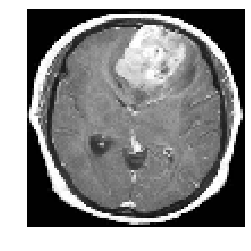

Does this patient has a tumor ? : yes


In [25]:
type_2 = preprocessing.image.load_img('H:/FYP/test/yes/Y13.jpg',
                                      target_size=(width, height))
plt.imshow(type_2)
plt.axis("off")
plt.show()

type_2_X = np.expand_dims(type_2, axis=0)

predictions = model.predict(type_2_X)

print('Does this patient has a tumor ? : {}'.format(class_names[np.argmax(predictions)]))

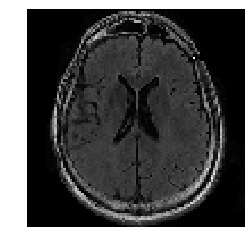

Does this patient has a tumor ? : no


In [21]:
type_1 = preprocessing.image.load_img('H:/FYP/test/no/7no.jpg',
                                      target_size=(width, height))
plt.imshow(type_1)
plt.axis("off")
plt.show()

type_1_X = np.expand_dims(type_1, axis=0)

predictions = model.predict(type_1_X)

print('Does this patient has a tumor ? : {}'.format(class_names[np.argmax(predictions)]))

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 94, 94, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 47, 47, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15488)             0         
__________

In [23]:
model.save('brain_tumor_yes_no.h5')